In [ ]:
# Importing visulizing and manupilation tools
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import seaborn as sns
import tensorflow as tf
%matplotlib inline

# Show Confusion Matriximport numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Pre-processing tools

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight

# Deep Learning tools
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing Deep Learning tools
# As we are also going to use Neural network models so importing necessities
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import warnings

# Model Evaluations
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import RocCurveDisplay

In [ ]:
import gdown
import zipfile

# Define the URL
#url = 'https://drive.google.com/file/d/1kEinYc0Vhos25Mc6QJ8xOWV2CVA01nZy/view?usp=sharing'
url = 'https://drive.google.com/file/d/113ujeUZV4uW71U6Yu6Xl8k4Ds3C1ErRR/view?usp=sharing'
# Extract file ID from the URL
file_id = url.split('/')[-2]

# Construct download link
download_link = 'https://drive.google.com/uc?export=download&id=' + file_id

# Download the file
zip_file_path = 'brain_tumor.zip'  # Specify the path to save the downloaded zip file
gdown.download(download_link, zip_file_path, quiet=False)

# Extract the contents of the zip file to the current directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# Remove the downloaded zip file
os.remove(zip_file_path)

print("Extraction completed successfully.")


Downloading...
From (original): https://drive.google.com/uc?export=download&id=113ujeUZV4uW71U6Yu6Xl8k4Ds3C1ErRR
From (redirected): https://drive.google.com/uc?export=download&id=113ujeUZV4uW71U6Yu6Xl8k4Ds3C1ErRR&confirm=t&uuid=387fe29a-3459-4ab6-b93d-639d11384a18
To: /content/brain_tumor.zip
100%|██████████| 734M/734M [00:07<00:00, 92.3MB/s]


Extraction completed successfully.


In [ ]:
# Task 1: Import images with labels and print in a tabular format
data_folder = "brain_tumor"
tumor_types = {"1": "glioma", "2": "meningioma", "3": "pituitary"}


In [ ]:
import os
from PIL import Image
import numpy as np
from tabulate import tabulate

def load_images_from_folder(folder, tumor_types):
    images = []
    labels = []
    filenames = []  # Collect filenames for tabular printing
    for tumor_type, tumor_name in tumor_types.items():
        tumor_folder = os.path.join(folder, tumor_type)
        for filename in os.listdir(tumor_folder):
            if filename.endswith(".png"):  # Assuming images are png format
                img = Image.open(os.path.join(tumor_folder, filename))
                if img is not None:
                    images.append(np.array(img))
                    labels.append(tumor_name)  # Use tumor type name instead of numerical label
                    filenames.append(filename)  # Collect filenames
    return images, labels, filenames

# Load images and labels
images, labels, filenames = load_images_from_folder("brain_tumor", {"1": "glioma", "2": "meningioma", "3": "pituitary"})

# Prepare data for tabular printing
table_data = []
for filename, label in zip(filenames, labels):
    table_data.append([filename, label])

# Print images and labels in a tabular format
print(tabulate(table_data, headers=["Filename", "Tumor Type"]))


Filename    Tumor Type
----------  ------------
2669.png    glioma
2992.png    glioma
2318.png    glioma
2917.png    glioma
2836.png    glioma
2885.png    glioma
2926.png    glioma
2915.png    glioma
2803.png    glioma
2867.png    glioma
2527.png    glioma
2396.png    glioma
2674.png    glioma
2634.png    glioma
2313.png    glioma
2879.png    glioma
2502.png    glioma
2666.png    glioma
2662.png    glioma
2965.png    glioma
2990.png    glioma
2823.png    glioma
2622.png    glioma
3037.png    glioma
2808.png    glioma
3055.png    glioma
2519.png    glioma
2375.png    glioma
2884.png    glioma
3046.png    glioma
2593.png    glioma
2820.png    glioma
2333.png    glioma
2493.png    glioma
2818.png    glioma
2379.png    glioma
2902.png    glioma
2474.png    glioma
2760.png    glioma
2596.png    glioma
3031.png    glioma
3057.png    glioma
2963.png    glioma
2968.png    glioma
2416.png    glioma
2408.png    glioma
2910.png    glioma
2953.png    glioma
2703.png    glioma
3053.png    glioma
30

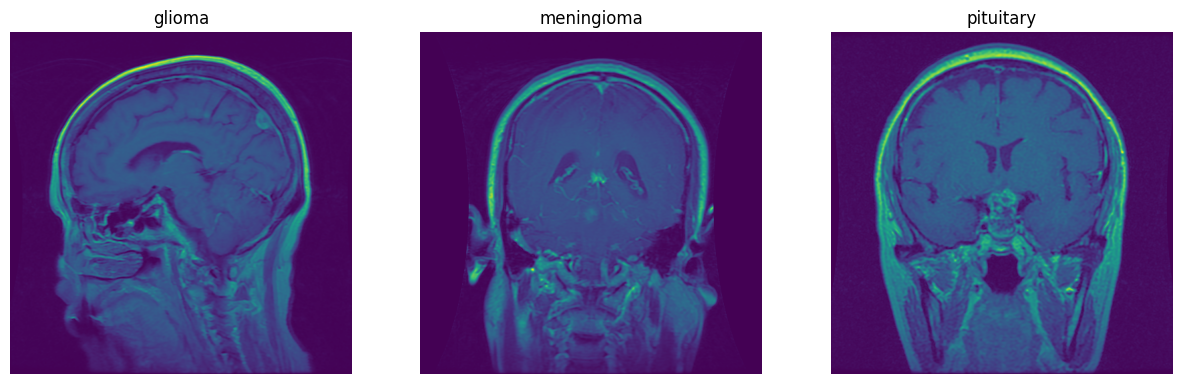

In [ ]:
# plot one image per class
import os
import matplotlib.pyplot as plt
from PIL import Image

def plot_one_image_per_class(data_folder, tumor_types):
    fig, axs = plt.subplots(1, len(tumor_types), figsize=(15, 5))

    for i, (label, tumor_type) in enumerate(tumor_types.items()):
        folder_path = os.path.join(data_folder, label)
        filenames = os.listdir(folder_path)
        if filenames:  # Check if the directory is not empty
            image_path = os.path.join(folder_path, filenames[0])
            img = Image.open(image_path)
            axs[i].imshow(img)
            axs[i].set_title(tumor_type)
            axs[i].axis('off')

    plt.show()
plot_one_image_per_class(data_folder, tumor_types)


In [ ]:
for i in range(len(images)):
    print("Label:", labels[i])
    print("Image:")
    print(images[i])
    print("-" * 30)

Streaming output truncated to the last 5000 lines.
 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]]
------------------------------
Label: pituitary
Image:
[[[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 ...

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84

In [ ]:
def describe_data(images, labels):
    num_images = len(images)
    unique_labels = np.unique(labels)
    label_counts = {label: labels.count(label) for label in unique_labels}

    print("Data Description:")
    print("-" * 20)
    print(f"Total number of images: {num_images}")
    print("Number of images per tumor type:")
    for label, count in label_counts.items():
        print(f"- {label}: {count}")

# Assuming 'images' and 'labels' are already loaded
describe_data(images, labels)


Data Description:
--------------------
Total number of images: 3064
Number of images per tumor type:
- glioma: 708
- meningioma: 1426
- pituitary: 930


In [ ]:
def images_per_class(labels):
    unique_labels = np.unique(labels)
    image_counts = {label: labels.count(label) for label in unique_labels}
    return image_counts

def median_images_per_class(labels):
    # Calculate the number of images per class
    image_counts = images_per_class(labels)

    # Extract counts and calculate median
    counts = list(image_counts.values())
    median_count = np.median(counts)

    return median_count

# Call the function with your labels
median_count = median_images_per_class(labels)

# Print the result
print(f"The median number of images per class is: {median_count}")

The median number of images per class is: 930.0


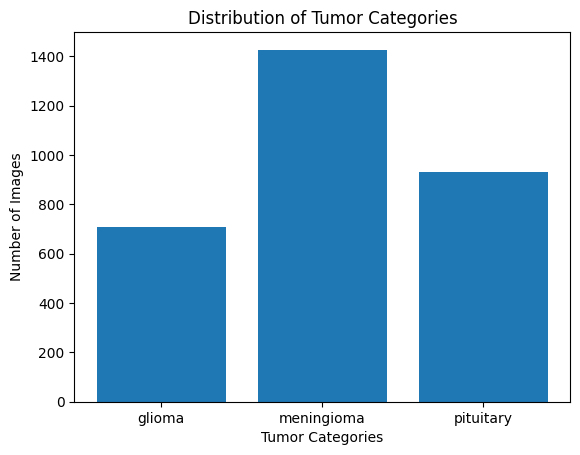

In [ ]:

# Task 2: Show Bar Diagram of Tumor Categories
unique_labels, counts = np.unique(labels, return_counts=True)
plt.bar(unique_labels, counts)
plt.xlabel('Tumor Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Tumor Categories')
plt.show()

In [ ]:
# Task 3: Convert Images to Grayscale and Preprocess
gray_images = [np.array(Image.fromarray(img).convert("L")) for img in images]
resized_images = [np.array(Image.fromarray(img).resize((224, 224))) for img in gray_images]
# Convert images to RGB and resize to (224, 224)
rgb_images = [cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in resized_images]

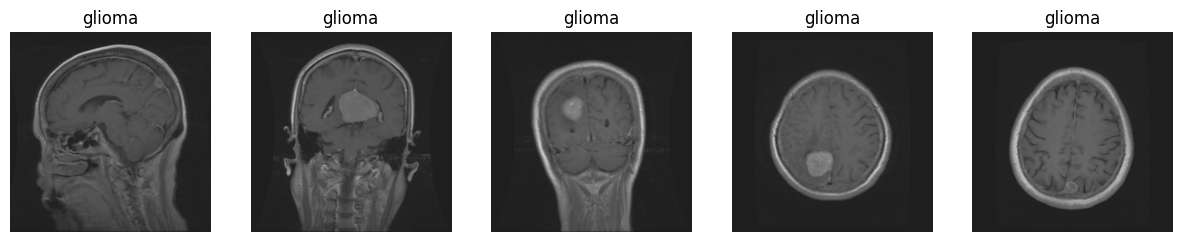

In [ ]:
# Define the number of images to display
num_images_to_display = 5

# Display the preprocessed images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    axes[i].imshow(rgb_images[i])
    axes[i].set_title(labels[i])
    axes[i].axis('off')

plt.show()

In [ ]:
# Task 4: Split Dataset into Training and Testing Sets
train_images, test_images, train_labels, test_labels = train_test_split(rgb_images, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
print("Number of images in training set:", len(train_images))
print("Number of images in testing set:", len(test_images))

Number of images in training set: 2451
Number of images in testing set: 613


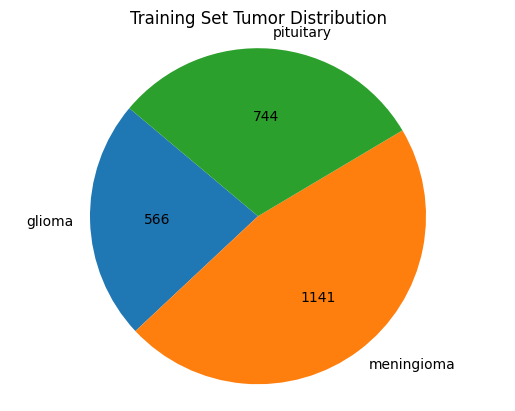

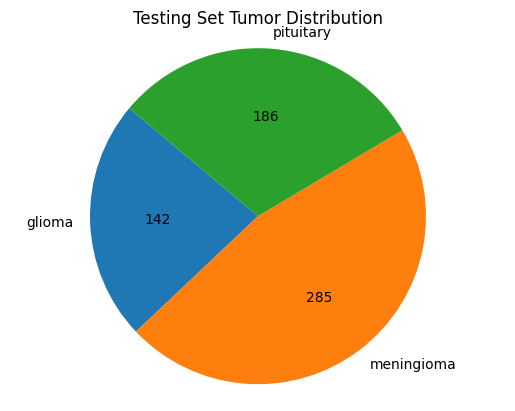

In [ ]:
# Task 5: Show pie charts to display the sizes of training and testing sets
def plot_pie_chart(labels, title):
    unique_labels, counts = np.unique(labels, return_counts=True)
    plt.pie(counts, labels=unique_labels, startangle=140, autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))
    plt.axis('equal')
    plt.title(title)
    plt.show()

plot_pie_chart(train_labels, "Training Set Tumor Distribution")
plot_pie_chart(test_labels, "Testing Set Tumor Distribution")

**ResNet50**

In [ ]:
from tensorflow.keras import applications, layers, models

# Define the tumor types for the number of output classes
tumor_types = {"1": "glioma", "2": "meningioma", "3": "pituitary"}

# Check the length of tumor_types
print("Number of tumor types:", len(tumor_types))  # Debugging line

# Load the ResNet50 model without the top layers and with pre-trained ImageNet weights
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Apply GlobalAveragePooling2D and check the shape
x = layers.GlobalAveragePooling2D()(base_model.output)
print("Shape after GlobalAveragePooling2D:", x.shape)  # Debugging line

# Add a Dense layer with softmax activation for multi-class classification
# For debugging, you can hardcode 3 instead of using len(tumor_types)
output = layers.Dense(len(tumor_types), activation='softmax')(x)  # or just use 3 instead of len(tumor_types)

# Create the model by specifying the input and output
model = models.Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to inspect the shapes
model.summary()


Number of tumor types: 3
Shape after GlobalAveragePooling2D: (None, 2048)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 23,540,739 (89.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Convert labels to one-hot encoded vectors
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_one_hot = to_categorical(test_labels_encoded)

I have created a subset of the training dataset,to reduce the dataset size for experimentation or training on a smaller scale, which can be beneficial for faster prototyping or debugging of machine learning models.And this effects the accuracy of the model.

In [ ]:
# Create subset of training datset
subset_size = 1000  # Adjust the subset size as needed
train_subset_images = train_images[:subset_size]
train_subset_labels_one_hot = train_labels_one_hot[:subset_size]

In [ ]:
# Fit the model using the subset of training data
history = model.fit(np.array(train_subset_images), train_subset_labels_one_hot, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 634s 24s/step - accuracy: 0.6986 - loss: 0.8567 - val_accuracy: 0.2450 - val_loss: 932.4454
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 607s 23s/step - accuracy: 0.9057 - loss: 0.2516 - val_accuracy: 0.2450 - val_loss: 167.8851
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 625s 23s/step - accuracy: 0.9195 - loss: 0.2397 - val_accuracy: 0.4600 - val_loss: 22.5264
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 607s 23s/step - accuracy: 0.9377 - loss: 0.1824 - val_accuracy: 0.7800 - val_loss: 1.6441
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 622s 23s/step - accuracy: 0.9732 - loss: 0.0796 - val_accuracy: 0.4950 - val_loss: 14.9084
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 574s 23s/step - accuracy: 0.9759 - loss: 0.0556 - val_accuracy: 0.6700 - val_loss: 2.6192
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 657s 24s/step - accuracy: 0.9938 - loss: 0.0333 - val_accuracy: 0.5700 - val_loss: 6.9462
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 603s 24s/step - accuracy: 0.9905 - loss: 0.0381 - val_accura

In [ ]:
# Plotting Loss
def plot_loss(history):

    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

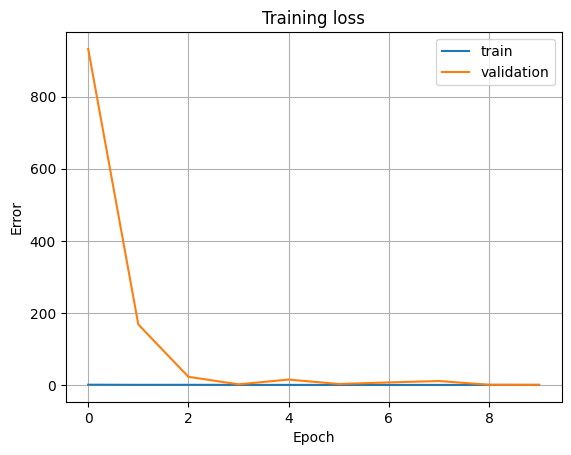

In [ ]:
plot_loss(history)

In [ ]:
# Plotting Accuracy
def plot_accuracy(history):

    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    #plt.ylim([0, 10])
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

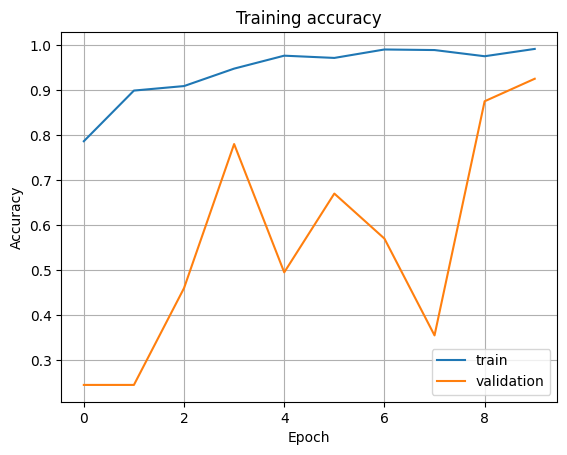

In [ ]:
plot_accuracy(history)

In [ ]:
test_predictions = model.predict(np.array(test_images))
test_labels_pred = np.argmax(test_predictions, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step


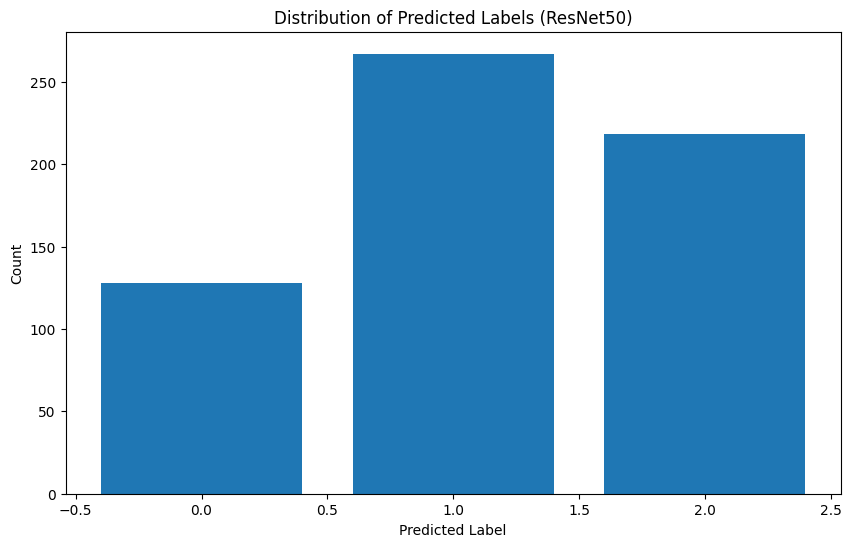

In [ ]:
# plot Distribution of predicted labels
import matplotlib.pyplot as plt

# Count occurrences of each predicted label
label_counts = {label: 0 for label in set(test_labels_pred)}
for label in test_labels_pred:
    label_counts[label] += 1

# Plot the distribution of predicted labels
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels (ResNet50)')
plt.show()

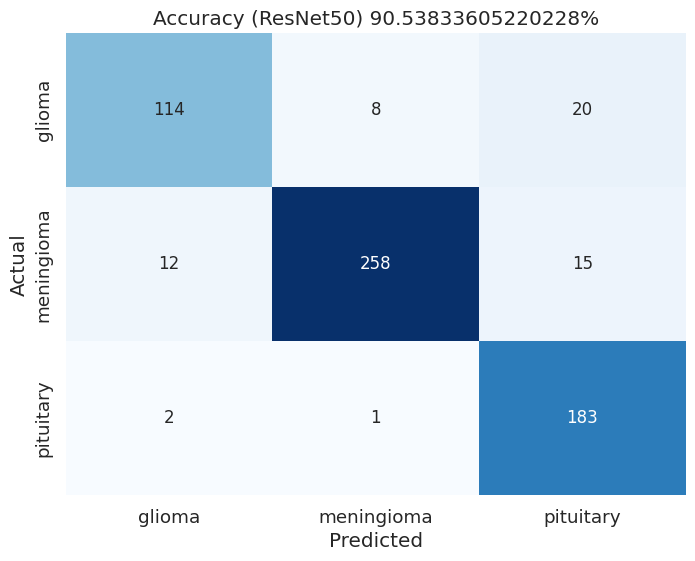

In [ ]:
# Create a heatmap for the confusion matrix
# Calculate confusion matrix
cm = confusion_matrix(test_labels_encoded, test_labels_pred)

# Define class labels
class_labels = [ "glioma", "meningioma",  "pituitary"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12}, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Accuracy (ResNet50) ' + str(metrics.accuracy_score(test_labels_encoded, test_labels_pred) * 100) + '%'
plt.title(title)
plt.show()

In [ ]:
# Print classification report for more detailed metrics
print(classification_report(test_labels_encoded, test_labels_pred, target_names=class_labels))

              precision    recall  f1-score   support

      glioma       0.89      0.80      0.84       142
  meningioma       0.97      0.91      0.93       285
   pituitary       0.84      0.98      0.91       186

    accuracy                           0.91       613
   macro avg       0.90      0.90      0.90       613
weighted avg       0.91      0.91      0.91       613



In [ ]:
print("Dimensions of test_labels_encoded:", test_labels_encoded.shape)
print("Dimensions of test_predictions:", test_predictions.shape)


Dimensions of test_labels_encoded: (613,)
Dimensions of test_predictions: (613, 3)


In [ ]:
from keras.utils import to_categorical

# Convert integer labels to one-hot encoded vectors
test_labels_encoded = to_categorical(test_labels_encoded, num_classes=len(class_labels))


<ipython-input-112-2f767f531639>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guess')


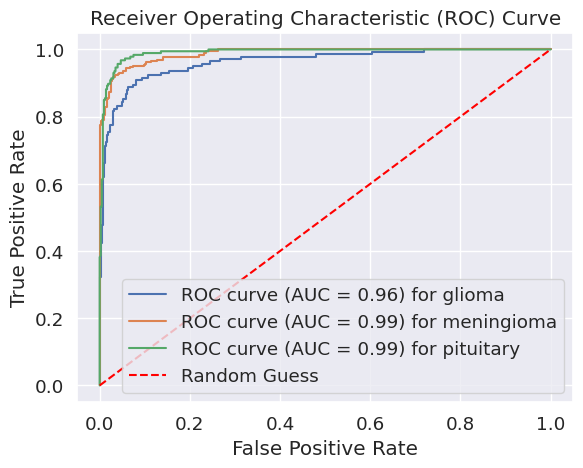

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(test_labels_encoded[:, i], test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for {class_labels[i]}')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**VGG16**

In [ ]:
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
# Convert labels to one-hot encoded vectors
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_one_hot = to_categorical(test_labels_encoded)

In [ ]:
# Load the pre-trained VGG16 model (excluding the top layers)
# Define the tumor types for the number of output classes
tumor_types = {"1": "glioma", "2": "meningioma", "3": "pituitary"}

# Check the length of tumor_types
print("Number of tumor types:", len(tumor_types))  # Debugging line

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model on top of the VGG16 base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(tumor_types), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Print model summary
model.summary()

Number of tumor types: 3


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 21,138,243 (80.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Convert labels to one-hot encoded vectors
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_one_hot = to_categorical(test_labels_encoded)

In [ ]:
# Create subset of training datset
subset_size = 1000  # Adjust the subset size as needed
train_subset_images = train_images[:subset_size]
train_subset_labels_one_hot = train_labels_one_hot[:subset_size]

In [ ]:
# Fit the model using the subset of training data
history = model.fit(np.array(train_subset_images), train_subset_labels_one_hot, epochs=10, batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1682s 67s/step - accuracy: 0.3741 - loss: 98.4281 - val_accuracy: 0.5400 - val_loss: 1.0644
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1634s 64s/step - accuracy: 0.4539 - loss: 1.0664 - val_accuracy: 0.3450 - val_loss: 1.0910
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1649s 65s/step - accuracy: 0.4310 - loss: 1.0452 - val_accuracy: 0.5200 - val_loss: 0.9860
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1611s 65s/step - accuracy: 0.5827 - loss: 0.9081 - val_accuracy: 0.6450 - val_loss: 0.8363
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1609s 64s/step - accuracy: 0.6342 - loss: 0.8365 - val_accuracy: 0.5200 - val_loss: 1.0005
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1660s 65s/step - accuracy: 0.5695 - loss: 0.9272 - val_accuracy: 0.6250 - val_loss: 0.8001
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1606s 64s/step - accuracy: 0.6419 - loss: 0.8095 - val_accuracy: 0.6400 - val_loss: 0.7609
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1639s 64s/step - accuracy: 0.6234 - loss: 0.8179 - val_acc

In [ ]:

# Plotting Loss
def plot_loss(history):

    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

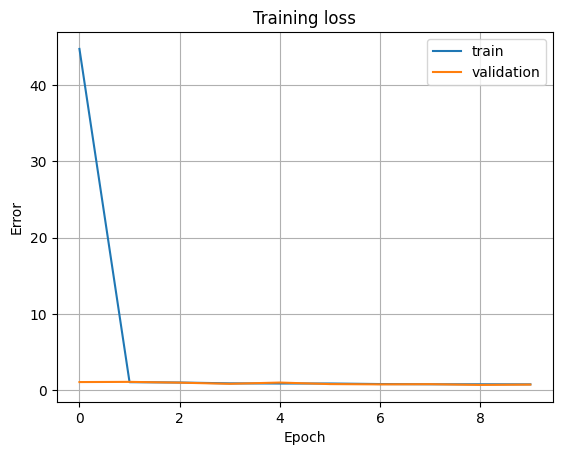

In [ ]:
plot_loss(history)

In [ ]:
# Plotting Accuracy
def plot_accuracy(history):

    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    #plt.ylim([0, 10])
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

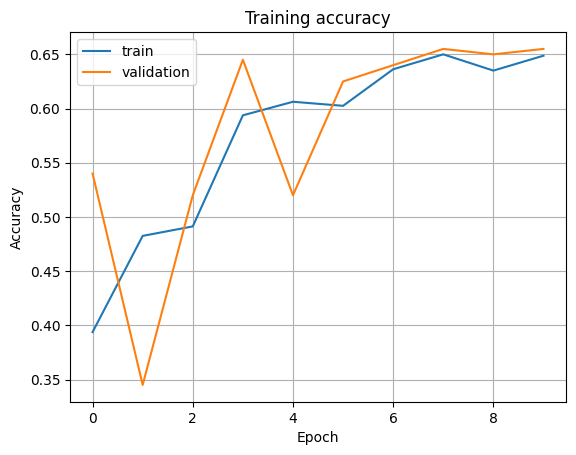

In [ ]:
plot_accuracy(history)

In [ ]:
test_predictions = model.predict(np.array(test_images))
test_labels_pred = np.argmax(test_predictions, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 341s 17s/step


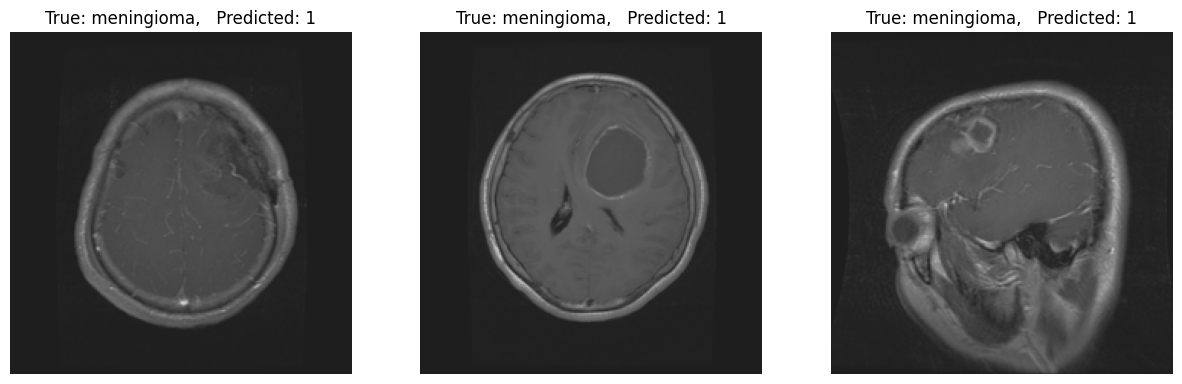

In [ ]:
import matplotlib.pyplot as plt

# Define the number of images to display
num_images_to_display = 3

# Display the test images along with their true and predicted labels
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f"True: {test_labels[i]},   Predicted: {test_labels_pred[i]}")
    axes[i].axis('off')

plt.show()

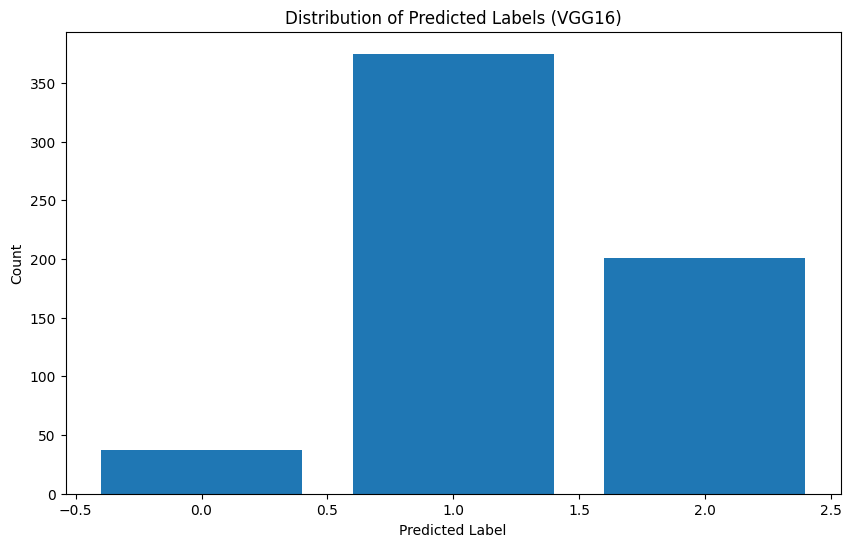

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each predicted label
label_counts = {label: 0 for label in set(test_labels_pred)}
for label in test_labels_pred:
    label_counts[label] += 1

# Plot the distribution of predicted labels
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels (VGG16)')
plt.show()

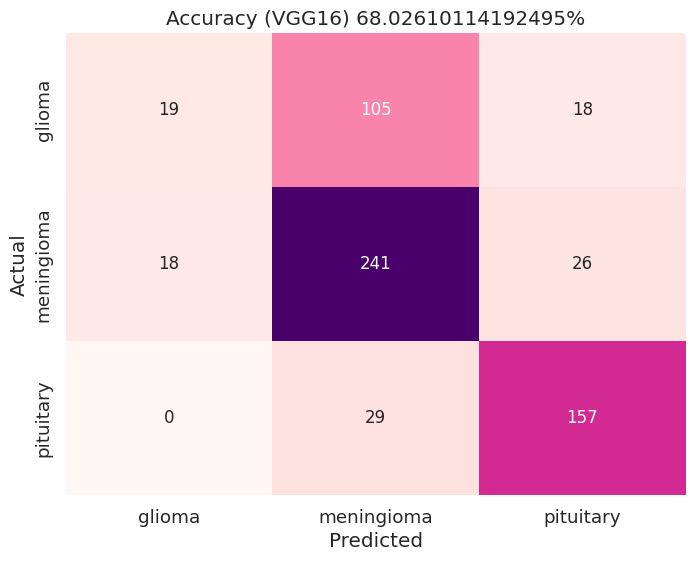

In [ ]:
# Create a heatmap for the confusion matrix
# Calculate confusion matrix
cm = confusion_matrix(test_labels_encoded, test_labels_pred)

# Define class labels
class_labels = [ "glioma", "meningioma",  "pituitary"]
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", cbar=False, annot_kws={"size": 12}, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Accuracy (VGG16) ' + str(metrics.accuracy_score(test_labels_encoded, test_labels_pred) * 100) + '%'
plt.title(title)
plt.show()

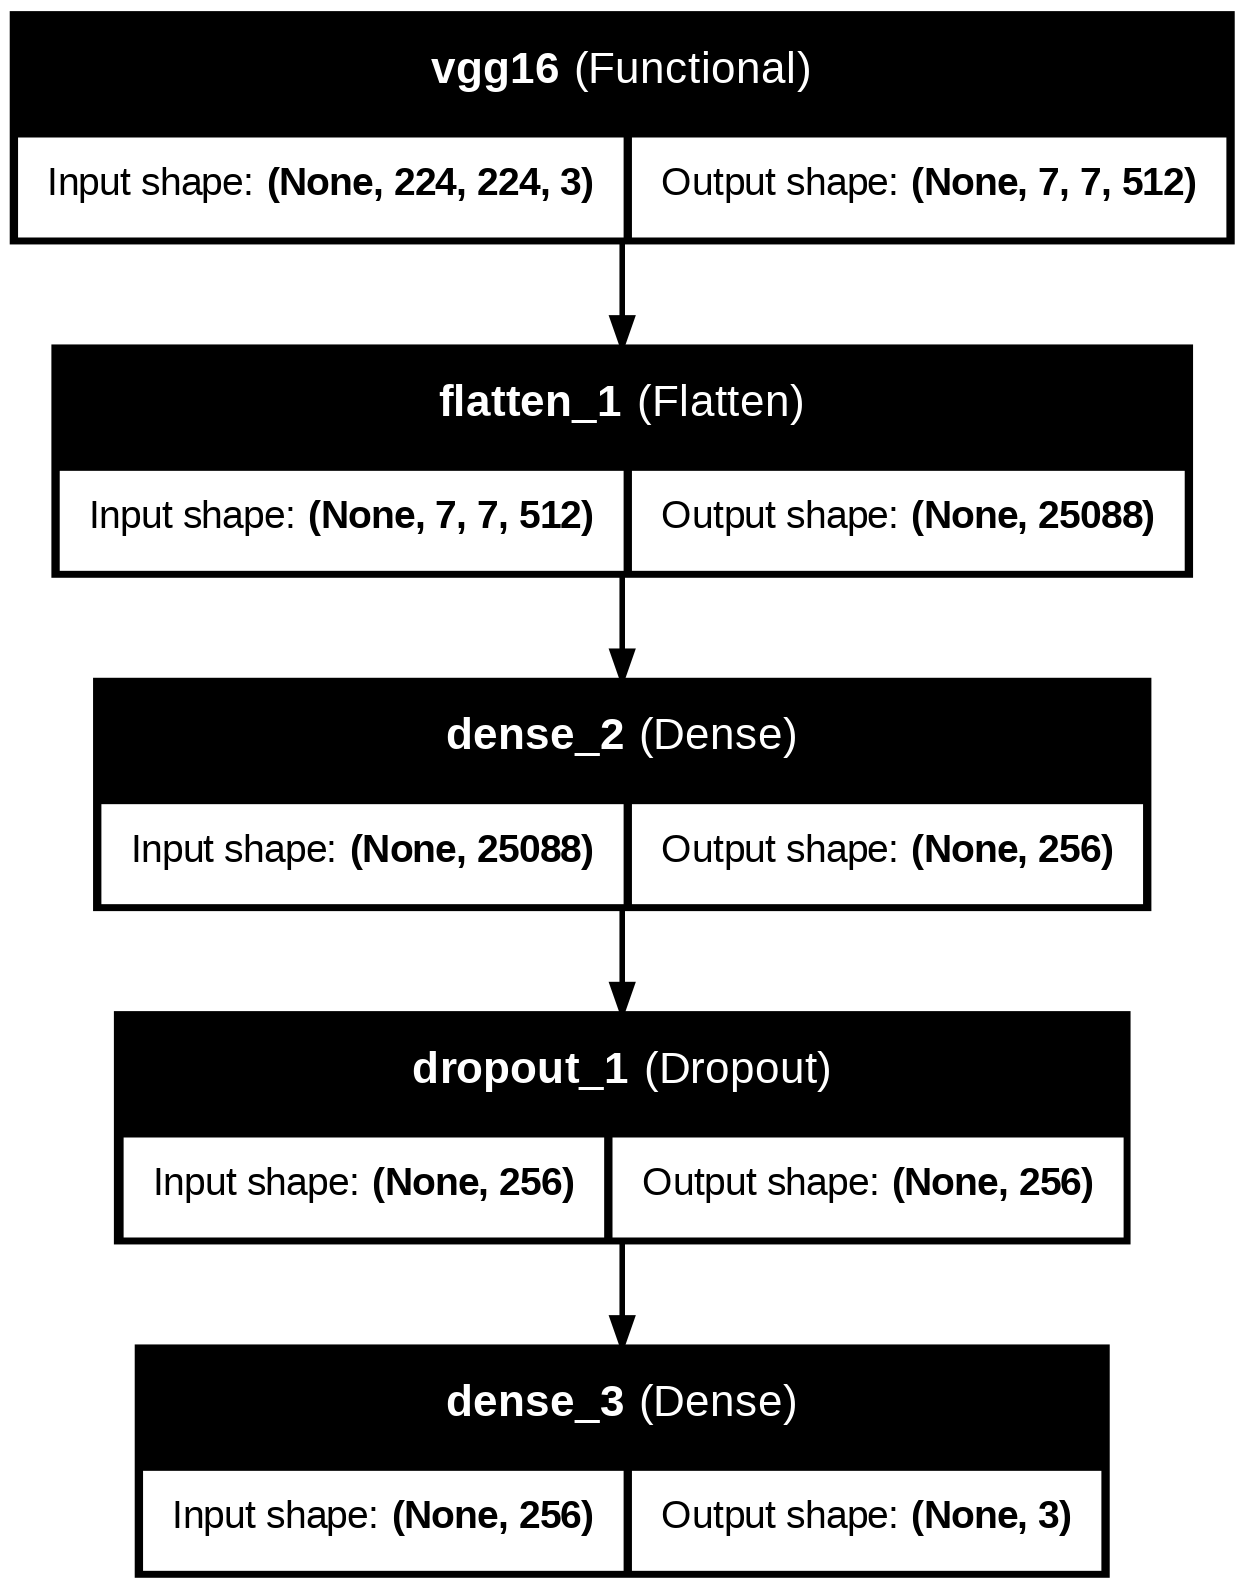

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='vgg16model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Print classification report for more detailed metrics
print(classification_report(test_labels_encoded, test_labels_pred, target_names=class_labels))

              precision    recall  f1-score   support

      glioma       0.51      0.13      0.21       142
  meningioma       0.64      0.85      0.73       285
   pituitary       0.78      0.84      0.81       186

    accuracy                           0.68       613
   macro avg       0.65      0.61      0.58       613
weighted avg       0.65      0.68      0.63       613



In [ ]:
# Convert integer labels to one-hot encoded vectors
test_labels_encoded = to_categorical(test_labels_encoded, num_classes=len(class_labels))

<ipython-input-34-829922eeab48>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guess')


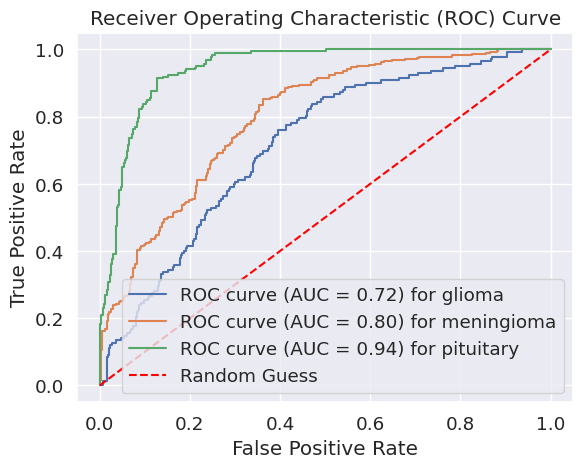

In [ ]:
#ROC and AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(test_labels_encoded[:, i], test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for {class_labels[i]}')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# Define your CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(tumor_types), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Fit the model using the subset of training data
history = model.fit(np.array(train_subset_images), train_subset_labels_one_hot, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.4651 - loss: 66.5661 - val_accuracy: 0.6900 - val_loss: 0.7025
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.6692 - loss: 0.7006 - val_accuracy: 0.7350 - val_loss: 0.6556
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.7324 - loss: 0.5811 - val_accuracy: 0.7750 - val_loss: 0.5847
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.7317 - loss: 0.5709 - val_accuracy: 0.7350 - val_loss: 0.5710
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.8059 - loss: 0.4289 - val_accuracy: 0.7450 - val_loss: 0.5918
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 169s 5s/step - accuracy: 0.8460 - loss: 0.3655 - val_accuracy: 0.8100 - val_loss: 0.5264
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.8837 - loss: 0.2939 - val_accuracy: 0.8100 - val_loss: 0.5107
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.8957 - loss: 0.2604 - val_accuracy: 0.8400 - 

In [ ]:
# Plotting Loss
def plot_loss(history):

    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

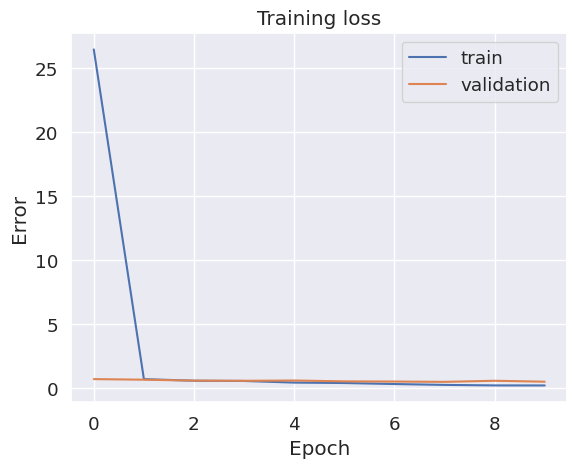

In [ ]:
plot_loss(history)

In [ ]:
# Plotting Accuracy
def plot_accuracy(history):

    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    #plt.ylim([0, 10])
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

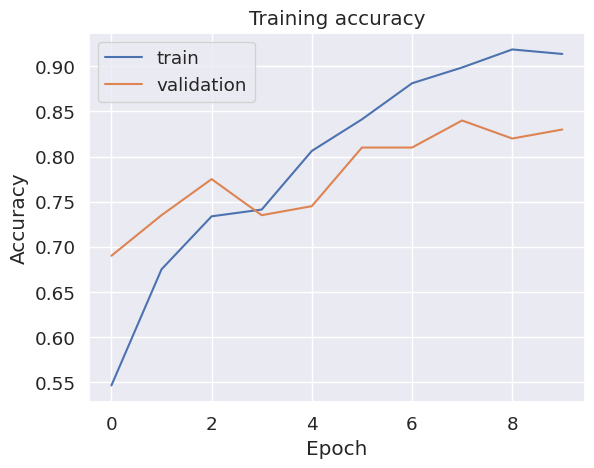

In [ ]:
plot_accuracy(history)

In [ ]:
test_predictions = model.predict(np.array(test_images))
test_labels_pred = np.argmax(test_predictions, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 894ms/step


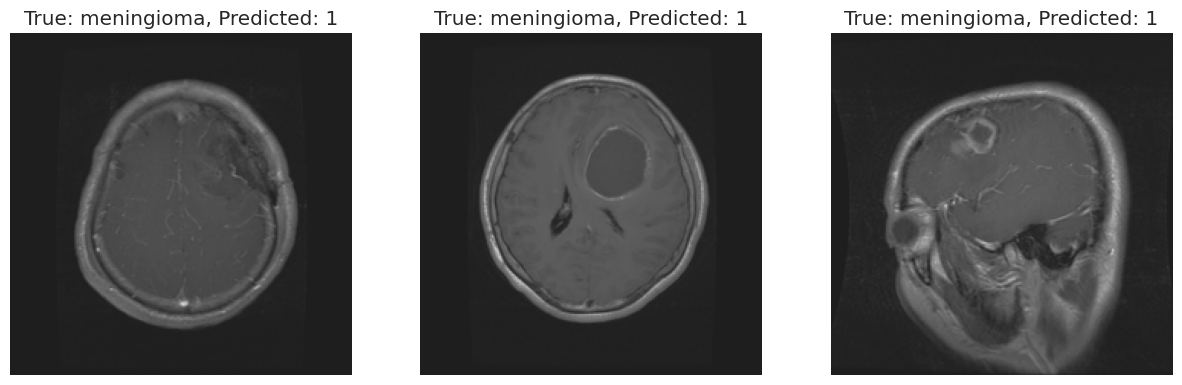

In [ ]:
import matplotlib.pyplot as plt

# Define the number of images to display
num_images_to_display = 3

# Display the test images along with their true and predicted labels
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f"True: {test_labels[i]}, Predicted: {test_labels_pred[i]}")
    axes[i].axis('off')

plt.show()

In [ ]:
# Convert labels to one-hot encoded vectors
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [ ]:
# Print classification report for more detailed metrics
print(classification_report(test_labels_encoded, test_labels_pred, target_names=class_labels))

              precision    recall  f1-score   support

      glioma       0.62      0.60      0.61       142
  meningioma       0.82      0.80      0.81       285
   pituitary       0.91      0.96      0.93       186

    accuracy                           0.80       613
   macro avg       0.78      0.79      0.78       613
weighted avg       0.80      0.80      0.80       613



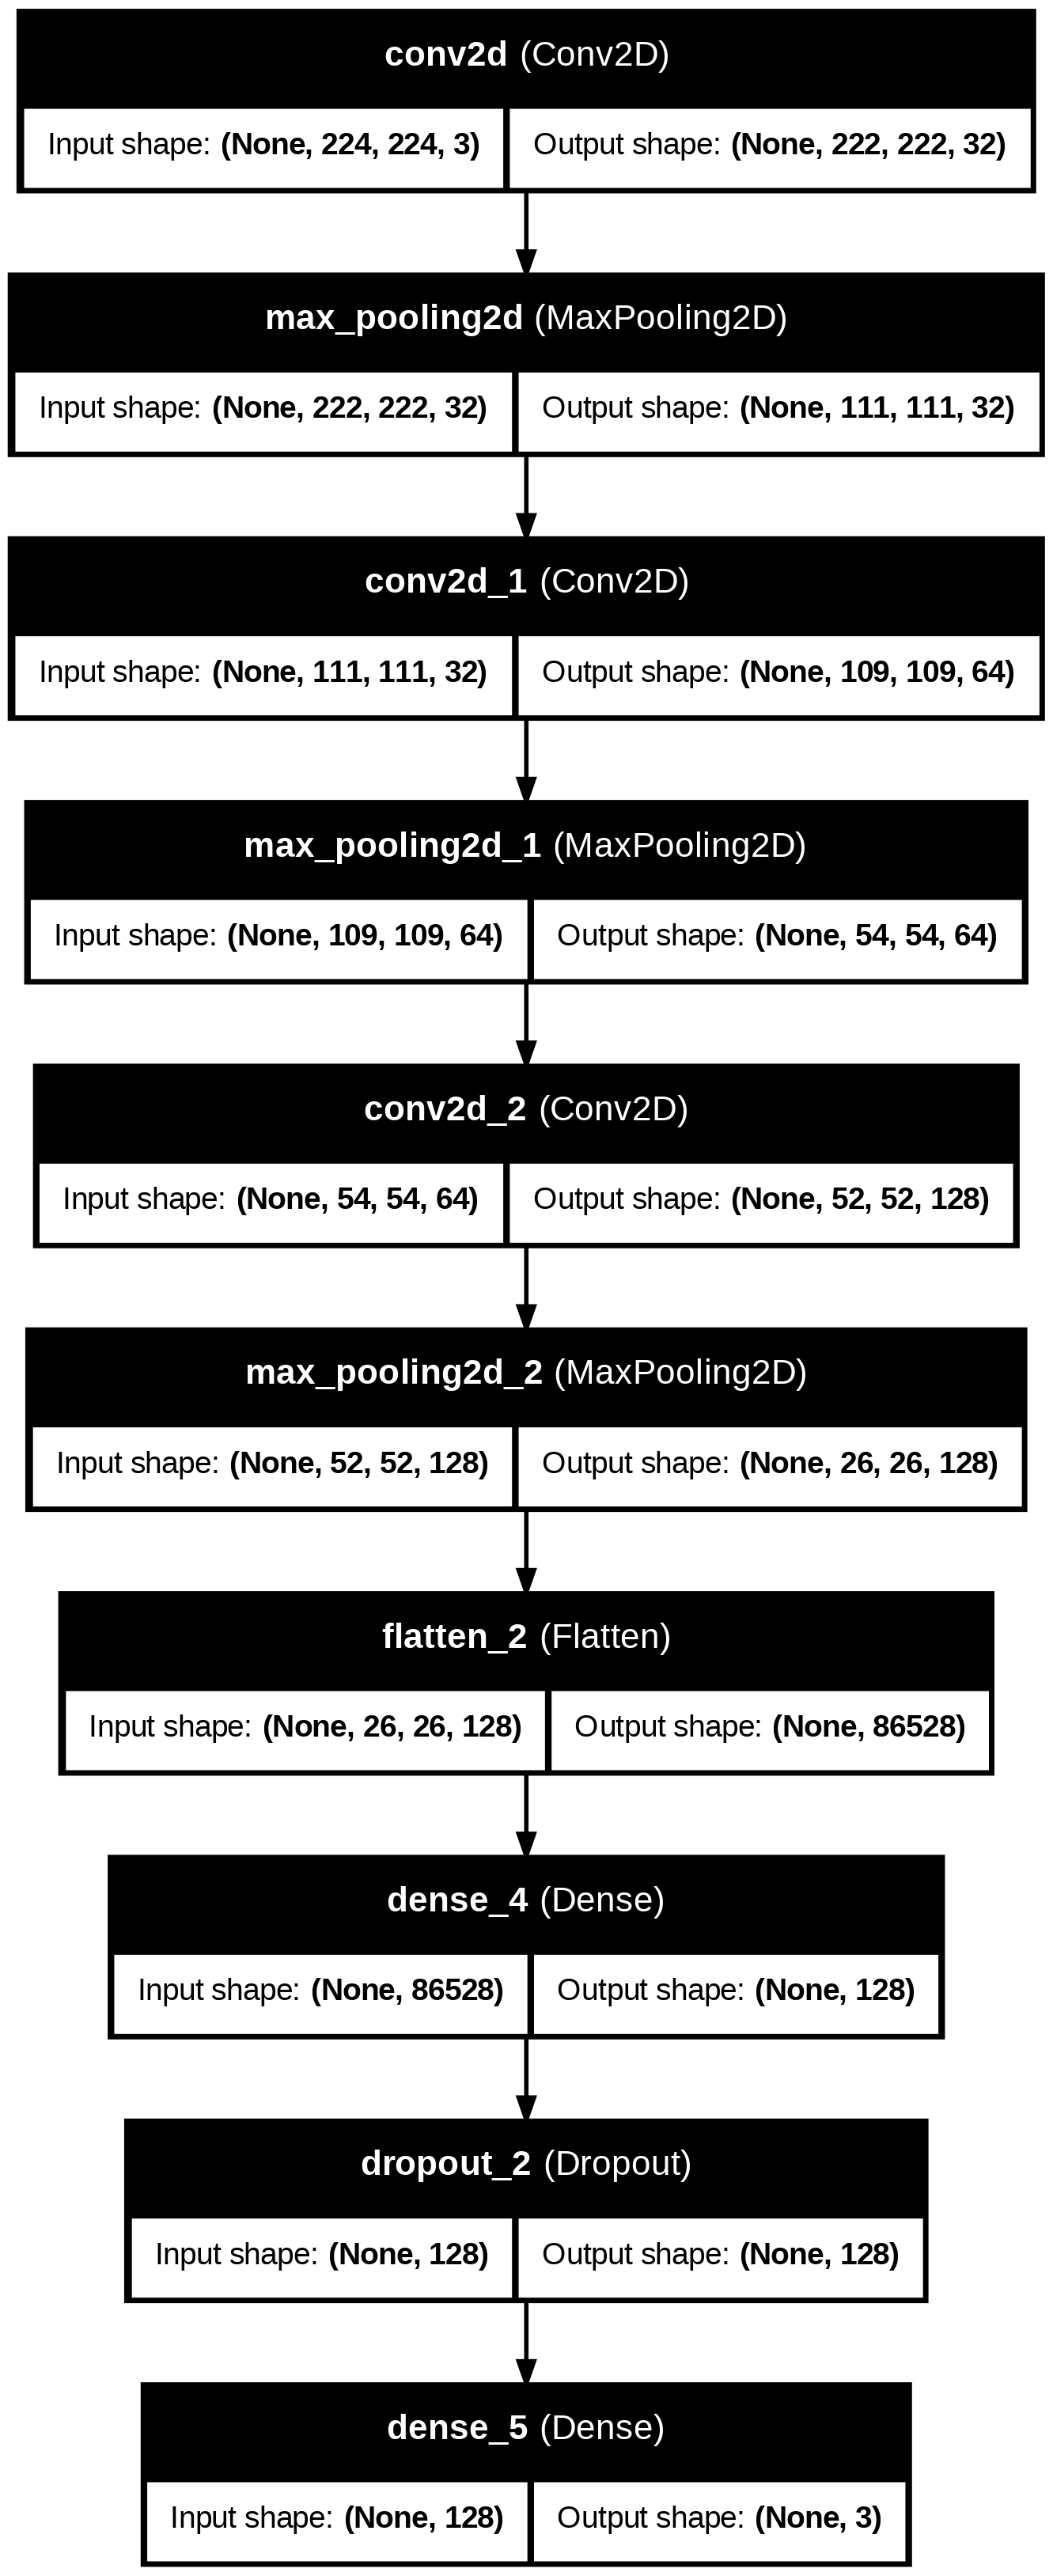

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)


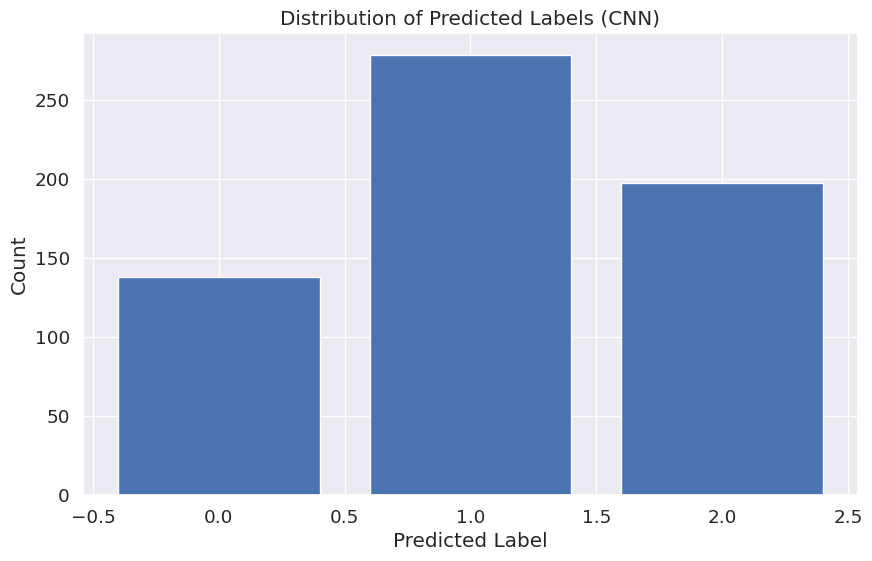

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each predicted label
label_counts = {label: 0 for label in set(test_labels_pred)}
for label in test_labels_pred:
    label_counts[label] += 1

# Plot the distribution of predicted labels
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels (CNN)')
plt.show()

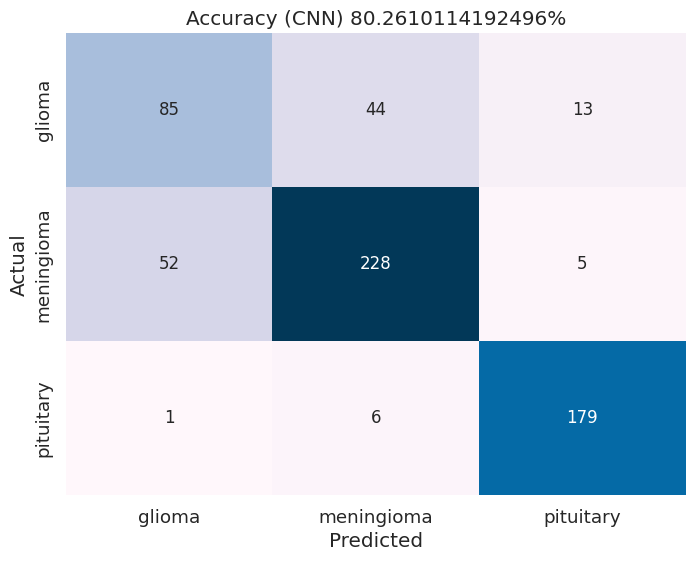

In [ ]:
# Assuming test_labels_encoded, and test_labels_pred are defined
cm = confusion_matrix(test_labels_encoded, test_labels_pred)
# Define class labels
class_labels = [ "glioma", "meningioma",  "pituitary"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBu", cbar=False, annot_kws={"size": 12}, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Accuracy (CNN) ' + str(metrics.accuracy_score(test_labels_encoded, test_labels_pred) * 100) + '%'
plt.title(title)
plt.show()


In [ ]:
# Convert integer labels to one-hot encoded vectors
test_labels_encoded = to_categorical(test_labels_encoded, num_classes=len(class_labels))

<ipython-input-54-829922eeab48>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guess')


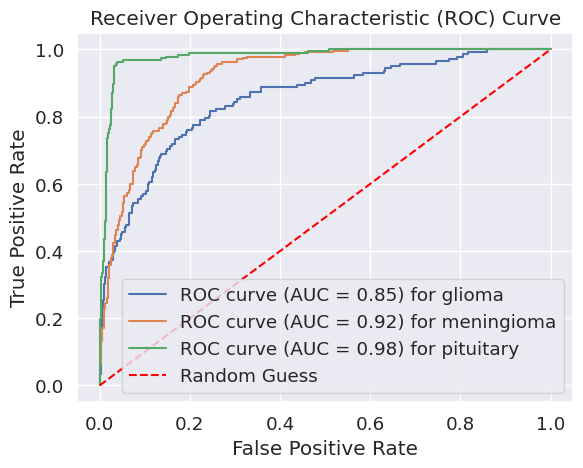

In [ ]:
#ROC and AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(test_labels_encoded[:, i], test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for {class_labels[i]}')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


as we have seen my custom cnn is not working upto the mark , lets further do some changes in the model and try to get better accuracy .


In [ ]:
# create another subset of traing dataset to increase performance and generalizability.
inc_subset_size = 2000  # Adjust the subset size as needed
inc_train_subset_images = train_images[:inc_subset_size]
inc_train_subset_labels_one_hot = train_labels_one_hot[:inc_subset_size]

In [ ]:
#custom cnn model

# Define your CNN model architecture with an additional convolutional layer
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),  # Additional Conv2D layer
    layers.MaxPooling2D((2, 2)),  # Additional MaxPooling2D layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(tumor_types), activation='softmax')
])

# Freeze the convolutional base
base_model.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit the model using the subset of training data
history = model.fit(np.array(train_subset_images), train_subset_labels_one_hot, epochs=12, batch_size=32, validation_split=0.2)

Key Differences Between CNN Approaches
1. Custom CNN with Pre-trained Base
Approach: Utilizes a pre-trained convolutional base (e.g., VGG16) with frozen layers.
Benefits:
Transfer Learning: Leverages pre-learned features, improving performance on small or similar datasets.
Efficiency: Faster training due to only training new layers.
Use Case: Ideal for limited data or when working with tasks similar to those the pre-trained model was trained on.
2. Custom CNN from Scratch
Approach: Builds and trains a CNN architecture entirely from scratch with all layers trainable.
Benefits:
Full Control: Customizable to specific dataset needs and architecture experiments.
Adaptation: Learns features specifically from the dataset, useful for highly specialized tasks.
Use Case: Best for unique datasets or when a pre-trained model is not suitable.

**Custom cnn from scratch**

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.regularizers import l2

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3),kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu',kernel_regularizer=l2(0.001)),  # Additional Conv2D layer
    layers.MaxPooling2D((2, 2)),  # Additional MaxPooling2D layer
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(len(tumor_types), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=1e-4)  # Try different learning rates
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Convert labels to one-hot encoded vectors
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_one_hot = to_categorical(test_labels_encoded)

In [ ]:
# create another subset of traing dataset to increase performance and generalizability.
inc_subset_size = 2000  # Adjust the subset size as needed
inc_train_subset_images = train_images[:inc_subset_size]
inc_train_subset_labels_one_hot = train_labels_one_hot[:inc_subset_size]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(np.array(inc_train_subset_images), inc_train_subset_labels_one_hot, epochs=20, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 213s 4s/step - accuracy: 0.4992 - loss: 7.3814 - val_accuracy: 0.6950 - val_loss: 1.1603
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 0.6321 - loss: 1.2748 - val_accuracy: 0.7425 - val_loss: 1.0782
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.6747 - loss: 1.1546 - val_accuracy: 0.7375 - val_loss: 1.0495
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.6878 - loss: 1.1338 - val_accuracy: 0.7900 - val_loss: 0.9809
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.7078 - loss: 1.0417 - val_accuracy: 0.7725 - val_loss: 0.9246
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.7261 - loss: 1.0056 - val_accuracy: 0.7925 - val_loss: 0.9241
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.7523 - loss: 0.9431 - val_accuracy: 0.7800 - val_loss: 0.8492
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.7567 - loss: 0.9327 - val_accuracy: 0.8100 - v

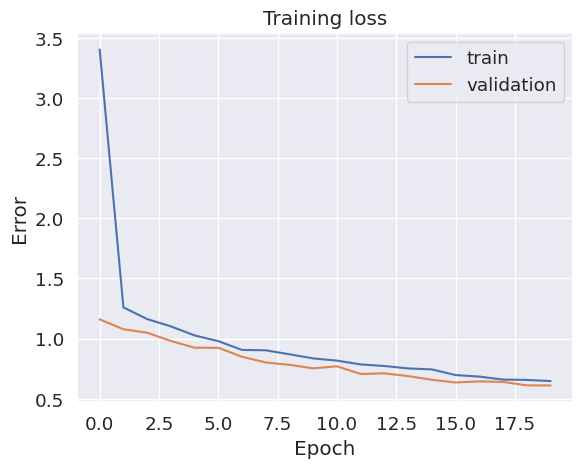

In [ ]:
# Plotting Loss
def plot_loss(history):

    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

plot_loss(history)

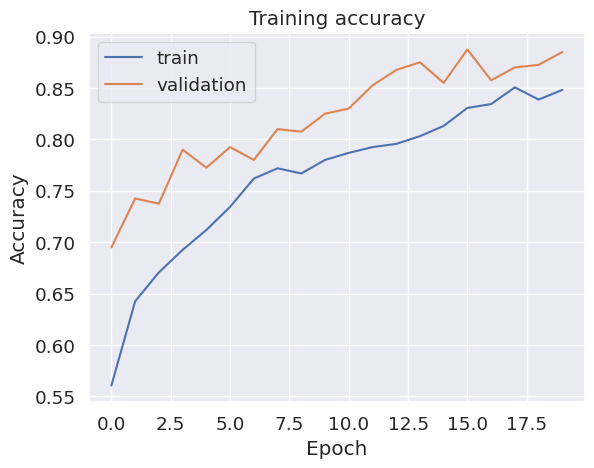

In [ ]:
# Plotting Accuracy
def plot_accuracy(history):

    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    #plt.ylim([0, 10])
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plot_accuracy(history)

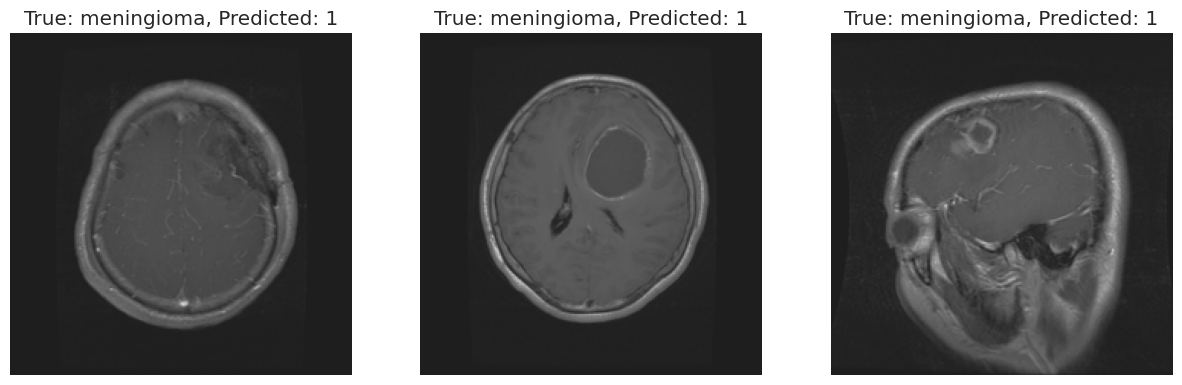

In [ ]:
import matplotlib.pyplot as plt

# Define the number of images to display
num_images_to_display = 3

# Display the test images along with their true and predicted labels
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f"True: {test_labels[i]}, Predicted: {test_labels_pred[i]}")
    axes[i].axis('off')

plt.show()

In [ ]:
test_predictions = model.predict(np.array(test_images))
test_labels_pred = np.argmax(test_predictions, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step


In [ ]:
# Show Confusion Matriximport numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

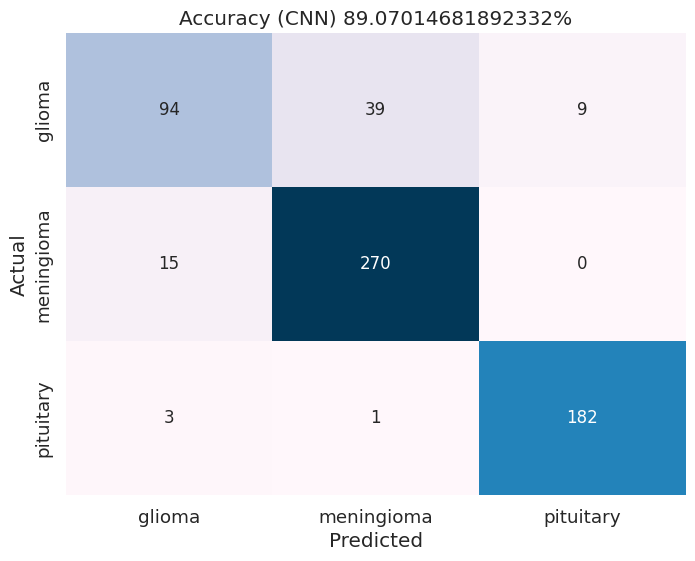

In [ ]:
cm = confusion_matrix(test_labels_encoded, test_labels_pred)
# Define class labels
class_labels = [ "glioma", "meningioma",  "pituitary"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBu", cbar=False, annot_kws={"size": 12}, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Accuracy (CNN) ' + str(metrics.accuracy_score(test_labels_encoded, test_labels_pred) * 100) + '%'
plt.title(title)
plt.show()

In [ ]:
# Print classification report for more detailed metrics
print(classification_report(test_labels_encoded, test_labels_pred, target_names=class_labels))

              precision    recall  f1-score   support

      glioma       0.84      0.66      0.74       142
  meningioma       0.87      0.95      0.91       285
   pituitary       0.95      0.98      0.97       186

    accuracy                           0.89       613
   macro avg       0.89      0.86      0.87       613
weighted avg       0.89      0.89      0.89       613



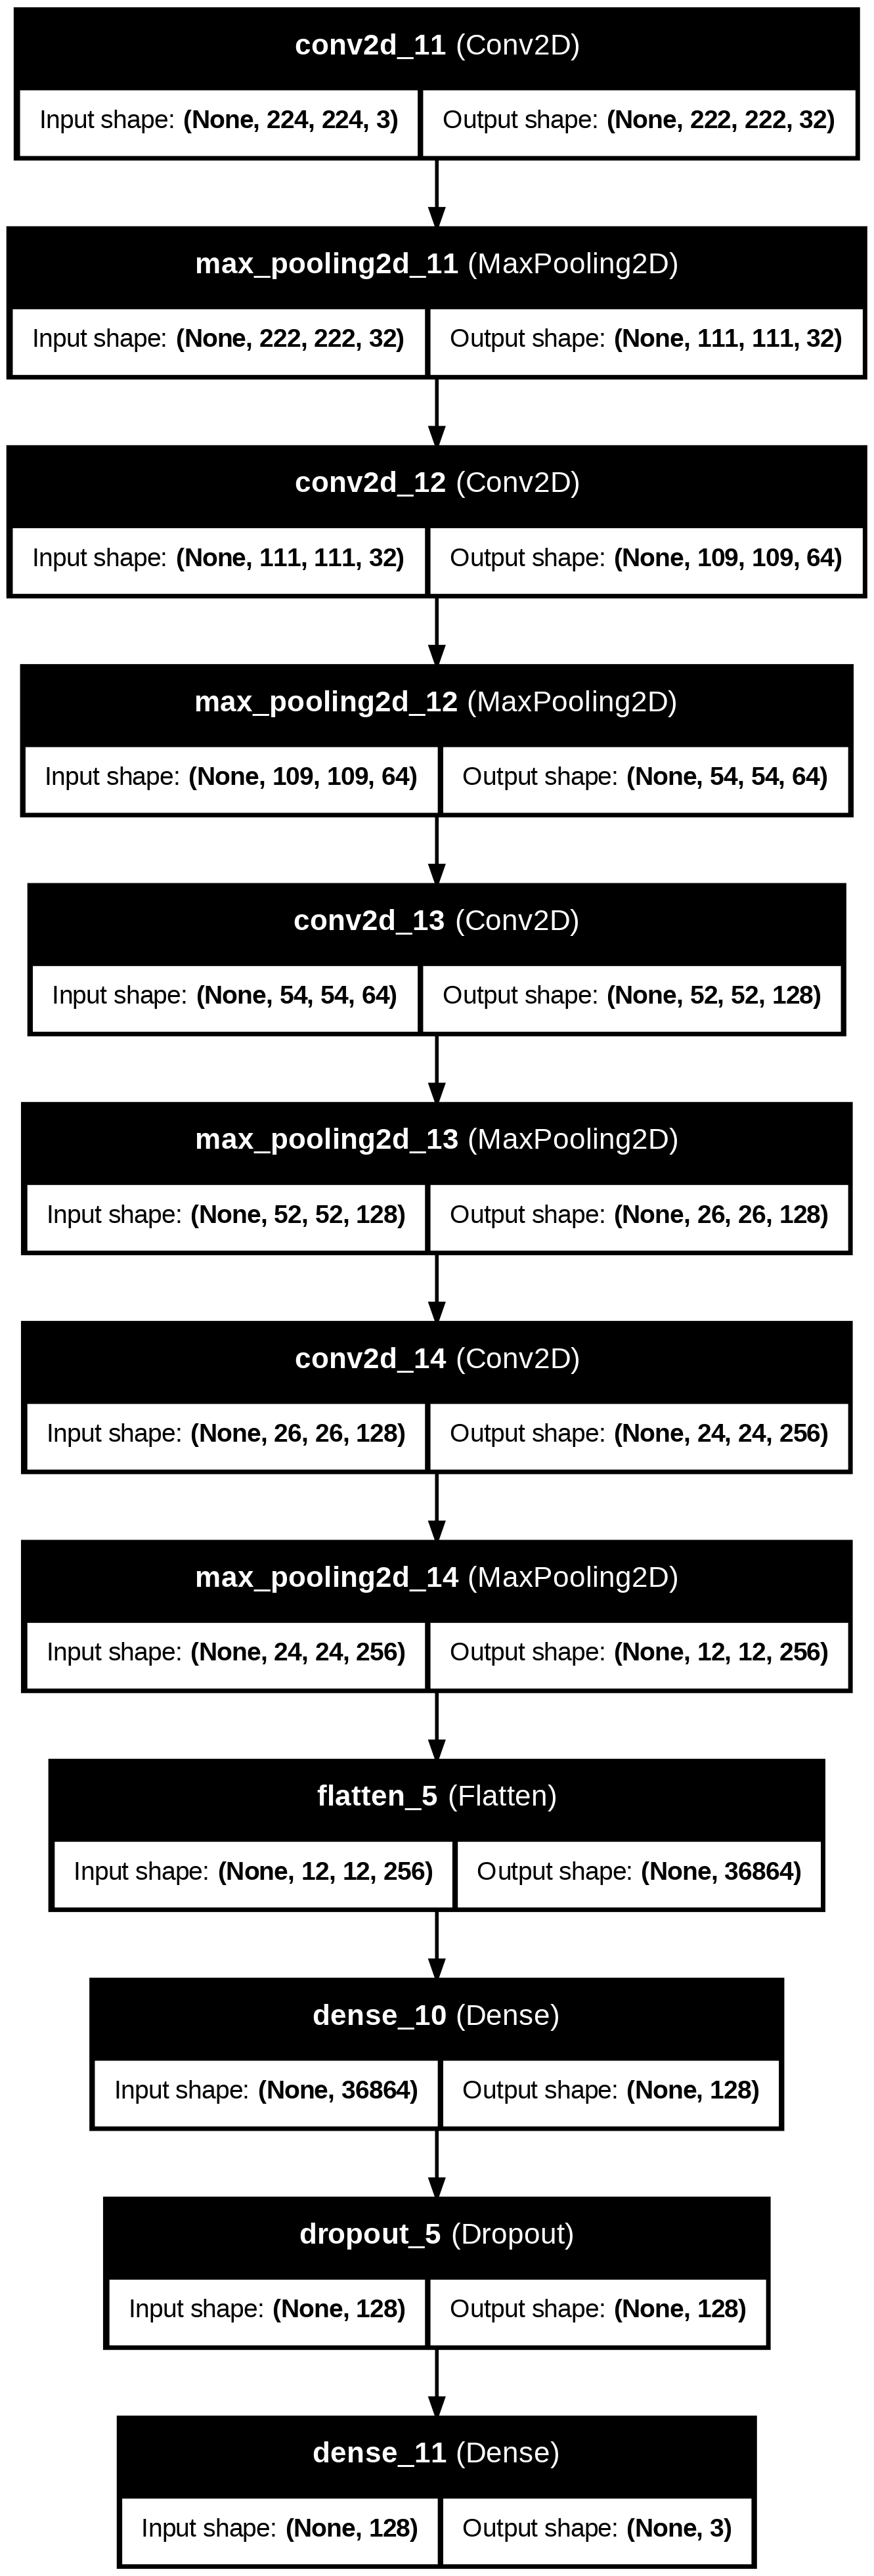

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Convert integer labels to one-hot encoded vectors
test_labels_encoded = to_categorical(test_labels_encoded, num_classes=len(class_labels))

<ipython-input-74-829922eeab48>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guess')


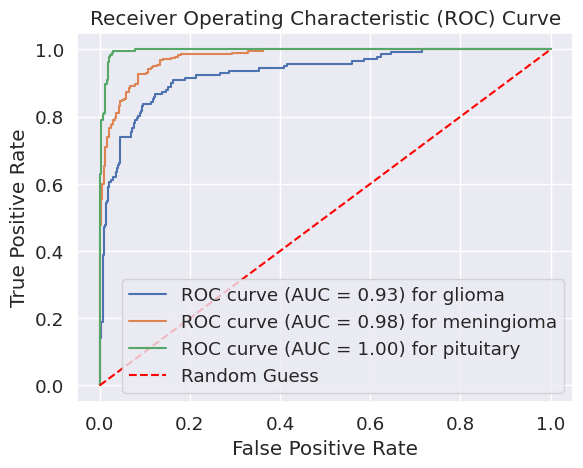

In [ ]:
#ROC and AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(test_labels_encoded[:, i], test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for {class_labels[i]}')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<ipython-input-79-c3eebe9f97cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
<ipython-input-79-c3eebe9f97cc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision (Macro Avg)', data=df, palette='viridis')
<ipython-input-79-c3eebe9f97cc>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall (Macro Avg)', data=df, palette='viridis')
<ipython-input-79-c3eebe9f97cc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

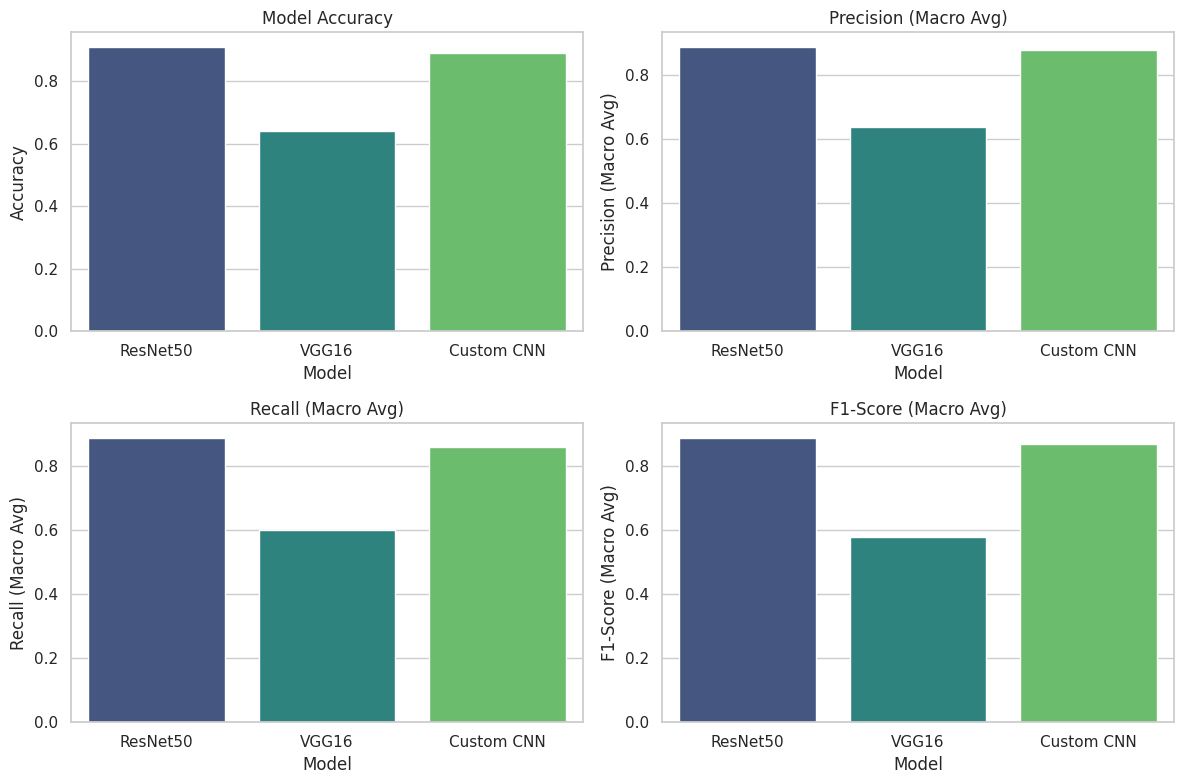

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for plotting
data = {
    'Model': ['ResNet50','VGG16', 'Custom CNN'],
    'Accuracy': [0.91, 0.64, 0.89],
    'Precision (Macro Avg)': [0.89, 0.64, 0.88],
    'Recall (Macro Avg)': [0.89, 0.60, 0.86],
    'F1-Score (Macro Avg)': [0.89, 0.58, 0.87]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Model Accuracy')

# Plot Precision (Macro Avg)
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision (Macro Avg)', data=df, palette='viridis')
plt.title('Precision (Macro Avg)')

# Plot Recall (Macro Avg)
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall (Macro Avg)', data=df, palette='viridis')
plt.title('Recall (Macro Avg)')

# Plot F1-Score (Macro Avg)
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1-Score (Macro Avg)', data=df, palette='viridis')
plt.title('F1-Score (Macro Avg)')

plt.tight_layout()
plt.show()


In [ ]:
# Define the data

